Kod dostępny pod adresem: https://github.com/Chimstaz/pyage

Stricte rozwiązanie problemu: https://github.com/Chimstaz/pyage/tree/master/pyage/tsp

# Optymalizacja problemu komiwojażera za pomocą metod genetycznych

Kod krzyżówki został zaimplementowany w oparciu o metodę przedstawioną w pracy dostępnej pod adresem http://user.ceng.metu.edu.tr/~ucoluk/research/publications/tspnew.pdf
W problemie szukana jest taka permutacja miast (reprezontowanych przez liczby naturalne od 0 do n), żeby suma odległość między miastami była jak najmniejsza. Permutacja jest reprezentowana w następujący sposób: na i-ty pozycji jest zapisane ile miast o numerze większym niż i poprzedza to miasto w opisywanej permutacji. Dzięki temu operacja krzyżowania jest trywialna.
Mutacja polega na losowej zmianie jednego z elementów reprezentacji permutacji. Łatwo zauważyć, że i-ty element może przyjąć wartości z przedziału [0, n - i]

## Opis konfiguracji

liczba wysp: 50

liczba osobników na wyspie: 80

prawdopodobieństwo mutacji: 10%

limit iteracji: 2000

### Wartości specyficzne dla algorytmu EMAS

minimalna energia: 10

minimalna energia do reprodukcji: 100

minimalna energia do migrowania: 120

energia nowego osobnika: 100

energia przekazywana przy spotkaniu: 40

### Wartości specyficzne dla algorytmu ewolucyjnego

ilość turniejów dla jednej generacji: 20

ilość osobników uczestniczących w jednym turnieju: 20

### Badana zmeinna

liczba punktów krzyżowania: 1, 5, 10, 20

## Badany problem

Jako wejścia użyłem zestawu "berlin52", zawierający położenie 52 ulic w Berlinie. Znane jest optymalne rozwiązanie o długości 7542 metrów.

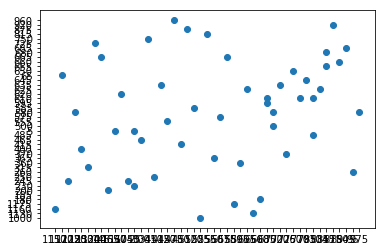

In [54]:
# wizualizacja problemu

import matplotlib.pyplot as plt

points = []
with open("in/cities.txt") as f:
    lines = f.readlines()
    for l in lines:
        x, y = l.split()
        points.append((x, y))

        
plt.scatter([x for x,y in points], [y for x,y in points])
plt.show()


In [55]:
# funkcja do rysowania rozwiązania:

def draw_TSP(points):
    plt.scatter([x for x,y in points], [y for x,y in points])
    plt.plot([x for x,y in points], [y for x,y in points])
    plt.show()

def load_fitness_history(filename):
    evox = []
    evoy = []
    with open(filename) as evo:
        lines = evo.readlines()
        for l in lines:
            x, y = l.split(';')
            evox.append(float(x))
            evoy.append(float(y))
    return (evox, evoy)

def plot_fitness_step(s1, f1, s2, f2, l1, l2):
    plt.plot(s1, f1, label=l1)
    plt.plot(s2, f2, label=l2)

    plt.legend()
    plt.xlabel('step')
    plt.ylabel('fitness [m]')
    plt.show()
    
def plot_fitness_time(s1, f1, s2, f2, l1, l2, t1, t2):
    plt.plot([x * t1 / (len(s1)*2) for x in s1], f1, label=l1)
    plt.plot([x * t2 / (len(s2)*2) for x in s2], f2, label=l2)

    plt.legend()
    plt.xlabel('time [s]')
    plt.ylabel('fitness [m]')
    plt.show()    

## 1 punkt krzyżowania

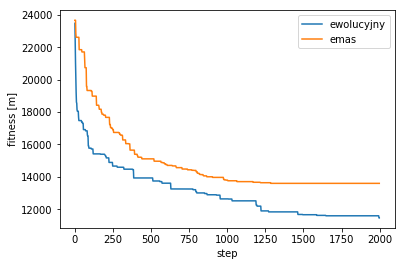

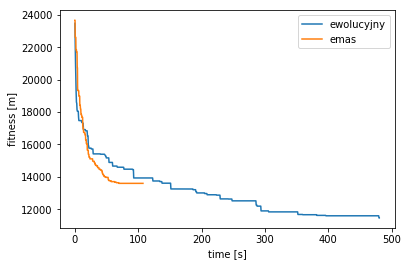

EMAS best fitness: 13598.104475
EVO  best fitness: 11465.8159771


In [56]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:27:59.037318_RandomMutation_1_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-14 23:24:11.266815_RandomMutation_1_PointCrossover_50-80.txt")
evotime = 481.016797066
emastime = 107.521346092

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

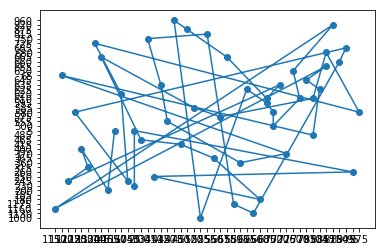

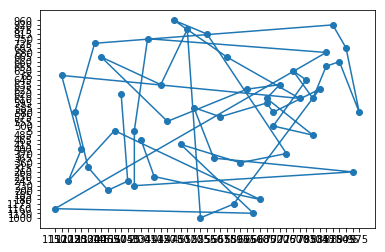

In [57]:
evosolution = [13, 12, 27, 26, 25, 38, 35, 31, 18, 40, 7, 48, 34, 33, 43, 36, 39, 42, 32, 4, 37, 23, 45, 46, 15, 49, 30, 17, 2, 44, 8, 9, 5, 3, 11, 51, 10, 50, 24, 14, 47, 0, 21, 16, 20, 22, 19, 28, 29, 41, 1, 6]
emasolution = [10, 51, 12, 26, 11, 50, 42, 3, 24, 5, 4, 47, 39, 37, 43, 45, 35, 38, 48, 30, 16, 17, 18, 7, 8, 23, 33, 34, 0, 21, 19, 41, 6, 1, 2, 14, 32, 9, 22, 49, 15, 44, 40, 31, 36, 46, 27, 25, 13, 28, 29, 20]

draw_TSP([points[i] for i in evosolution])
draw_TSP([points[i] for i in emasolution])

EMAS wygląda jakby mógł dać podobny rezultat jak ewolucyjne rozwiązanie w tym samym czasie, ale większej liczbie iteracji.

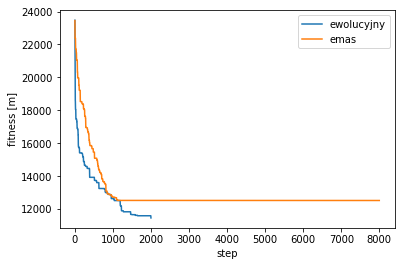

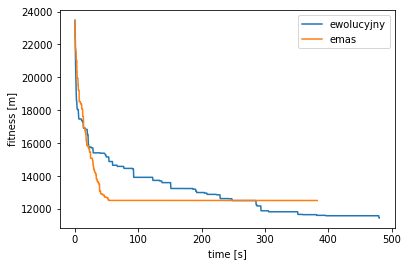

EMAS best fitness: 12523.9252252
EVO  best fitness: 11465.8159771


In [58]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:27:59.037318_RandomMutation_1_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-15 12:46:13.472947_RandomMutation_1_PointCrossover_50-80.txt")
evotime = 481.016797066
emastime = 382.635747194

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

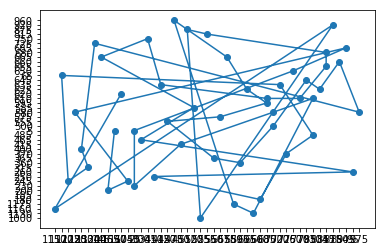

In [59]:
emasolution = [10, 32, 42, 7, 18, 44, 14, 4, 36, 35, 17, 2, 16, 21, 20, 41, 29, 28, 15, 45, 38, 46, 25, 26, 27, 50, 24, 5, 23, 37, 43, 49, 19, 30, 0, 34, 48, 31, 40, 8, 9, 47, 33, 22, 6, 1, 39, 3, 11, 51, 12, 13]

draw_TSP([points[i] for i in emasolution])

## 5 punkty krzyżowania



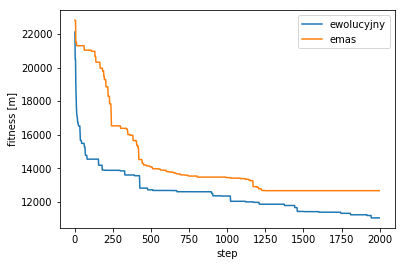

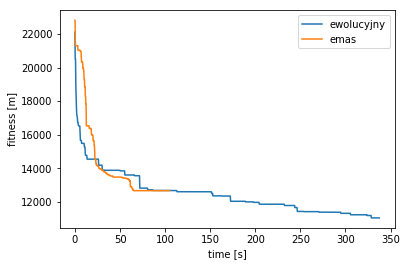

EMAS best fitness: 12660.3305353
EVO  best fitness: 11034.5860119


In [60]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:38:02.614198_RandomMutation_5_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-14 23:38:05.993369_RandomMutation_5_PointCrossover_50-80.txt")
evotime = 337.862875938
emastime = 104.965078831

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

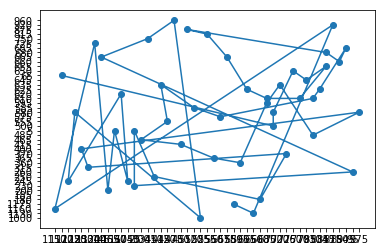

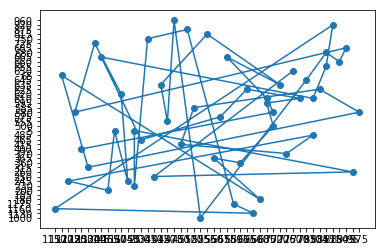

In [61]:
evosolution = [8, 9, 42, 32, 50, 12, 13, 51, 10, 25, 11, 7, 40, 2, 16, 41, 6, 1, 29, 28, 15, 26, 27, 24, 45, 38, 34, 49, 19, 22, 20, 30, 17, 21, 0, 47, 23, 3, 5, 14, 18, 44, 31, 48, 35, 36, 4, 37, 39, 33, 43, 46]
emasolution = [27, 33, 35, 31, 38, 44, 17, 30, 40, 7, 37, 14, 5, 3, 11, 50, 10, 51, 13, 12, 25, 45, 15, 22, 21, 23, 24, 26, 46, 28, 19, 49, 43, 34, 36, 48, 0, 20, 16, 47, 4, 42, 32, 9, 8, 18, 2, 6, 1, 41, 29, 39]

draw_TSP([points[i] for i in evosolution])
draw_TSP([points[i] for i in emasolution])

### Porównanie metody przy jednakowym czasie

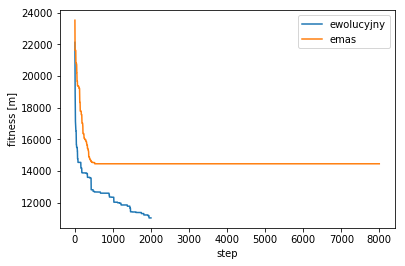

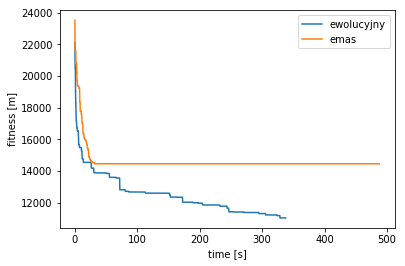

EMAS best fitness: 14451.6068292
EVO  best fitness: 11034.5860119


In [62]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:38:02.614198_RandomMutation_5_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-15 12:37:46.034537_RandomMutation_5_PointCrossover_50-80.txt")
evotime = 337.862875938
emastime = 487.879527092

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

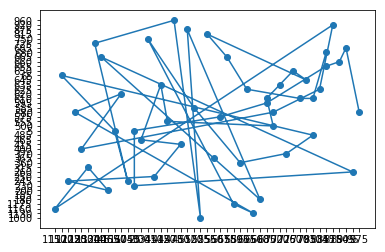

In [63]:
emasolution = [24, 3, 5, 4, 34, 0, 1, 6, 41, 16, 19, 28, 18, 7, 40, 50, 51, 13, 46, 45, 15, 49, 21, 2, 8, 9, 11, 10, 27, 33, 23, 42, 32, 26, 12, 25, 29, 22, 20, 17, 30, 43, 35, 38, 39, 37, 44, 31, 48, 36, 47, 14]

draw_TSP([points[i] for i in emasolution])

## 10 punktów krzyżowania

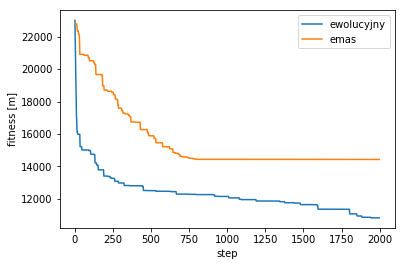

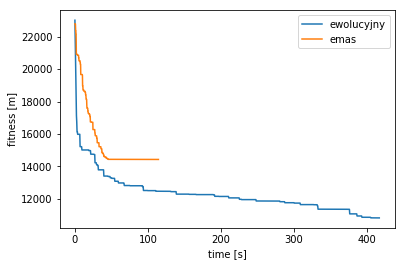

EMAS best fitness: 14431.28756
EVO  best fitness: 10827.7939382


In [64]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:11:28.464642_RandomMutation_10_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-14 23:14:00.390805_RandomMutation_10_PointCrossover_50-80.txt")
evotime = 417.563875735
emastime = 114.562167831

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

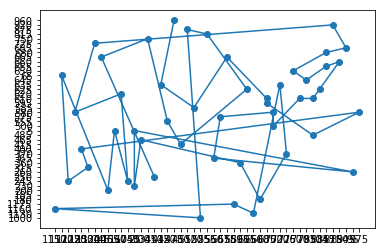

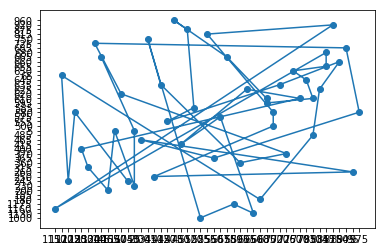

In [65]:
evosolution = [29, 16, 2, 30, 22, 48, 44, 18, 7, 32, 8, 9, 38, 15, 28, 49, 20, 6, 1, 41, 19, 0, 33, 43, 36, 47, 23, 5, 4, 37, 39, 14, 3, 42, 50, 11, 10, 51, 13, 12, 46, 25, 26, 27, 24, 45, 34, 35, 31, 21, 17, 40]
emasolution = [51, 11, 25, 46, 28, 45, 23, 5, 38, 30, 21, 18, 40, 31, 35, 34, 47, 37, 39, 4, 14, 32, 42, 44, 33, 43, 29, 41, 20, 19, 24, 3, 50, 10, 15, 49, 17, 2, 7, 8, 9, 0, 22, 48, 36, 27, 26, 12, 13, 6, 1, 16]

draw_TSP([points[i] for i in evosolution])
draw_TSP([points[i] for i in emasolution])

### Porównanie metody przy jednakowym czasie

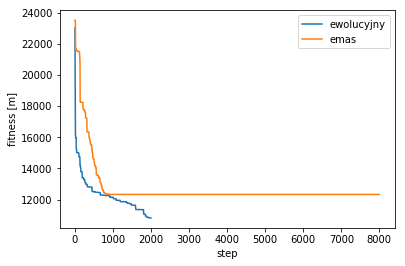

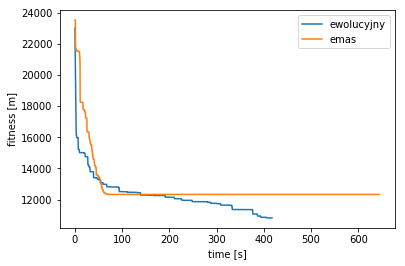

EMAS best fitness: 12334.9895501
EVO  best fitness: 10827.7939382


In [66]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-14 23:11:28.464642_RandomMutation_10_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-15 12:37:16.274342_RandomMutation_10_PointCrossover_50-80.txt")
evotime = 417.563875735
emastime = 644.618797779

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

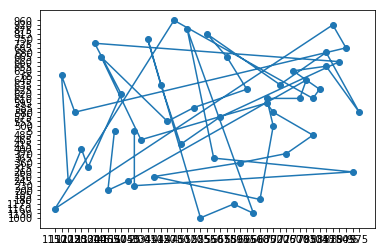

In [67]:
emasolution = [13, 12, 51, 37, 36, 35, 43, 28, 29, 49, 15, 45, 33, 34, 20, 16, 30, 21, 48, 31, 44, 38, 14, 24, 4, 39, 23, 47, 40, 32, 42, 3, 11, 46, 25, 27, 26, 10, 50, 5, 0, 22, 17, 2, 7, 8, 9, 18, 19, 41, 6, 1]

draw_TSP([points[i] for i in emasolution])

## 20 punktów krzyżowania

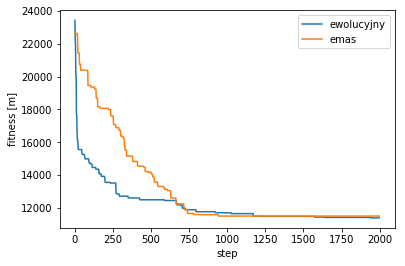

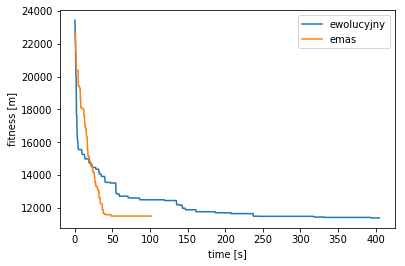

EMAS best fitness: 11499.0550275
EVO  best fitness: 11385.5960716


In [68]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-15 07:52:24.041643_RandomMutation_20_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-15 07:52:20.477344_RandomMutation_20_PointCrossover_50-80.txt")
evotime = 405.381218195
emastime = 101.593087912

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

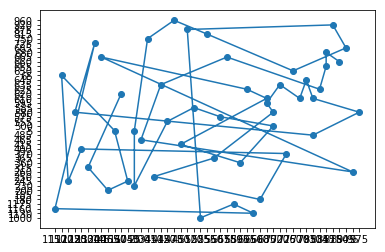

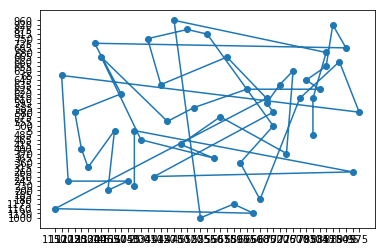

In [69]:
evosolution = [5, 14, 4, 23, 31, 17, 20, 41, 16, 48, 35, 22, 49, 43, 0, 21, 30, 6, 1, 2, 40, 44, 39, 3, 42, 18, 7, 8, 9, 32, 50, 11, 45, 24, 47, 37, 36, 38, 34, 33, 19, 29, 28, 15, 27, 25, 46, 13, 51, 12, 26, 10]
emasolution = [6, 1, 41, 29, 33, 34, 38, 39, 15, 0, 22, 19, 20, 16, 30, 21, 48, 23, 37, 4, 42, 3, 50, 10, 11, 27, 26, 13, 12, 51, 25, 46, 24, 5, 36, 28, 49, 43, 44, 18, 2, 17, 31, 35, 32, 9, 8, 7, 40, 14, 47, 45]

draw_TSP([points[i] for i in evosolution])
draw_TSP([points[i] for i in emasolution])

### Porównanie metody przy jednakowym czasie


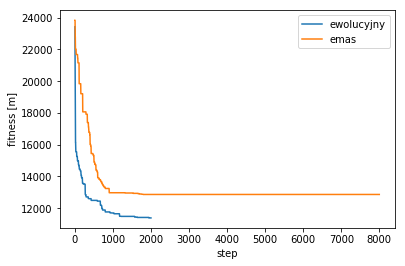

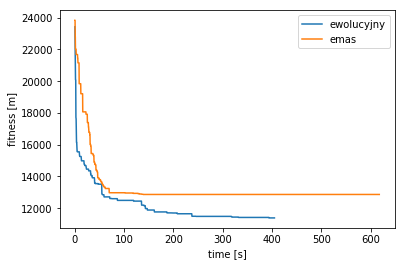

EMAS best fitness: 12863.5923389
EVO  best fitness: 11385.5960716


In [70]:
evox, evoy = load_fitness_history("out/fitness_pyage.tsp.evoconf_2018-03-15 07:52:24.041643_RandomMutation_20_PointCrossover_50-80.txt")
emasx, emasy = load_fitness_history("out/fitness_pyage.tsp.emasconf_2018-03-15 12:36:52.915108_RandomMutation_20_PointCrossover_50-80.txt")
evotime = 405.381218195
emastime = 617.927771091

plot_fitness_step(evox, evoy, emasx, emasy, "ewolucyjny", "emas")
plot_fitness_time(evox, evoy, emasx, emasy, "ewolucyjny", "emas", evotime, emastime)

print("EMAS best fitness:", emasy[-1])
print("EVO  best fitness:", evoy[-1])

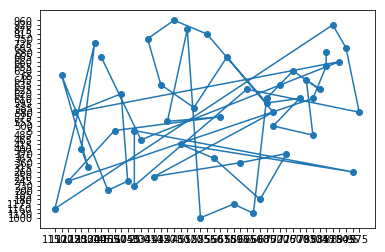

In [71]:
emasolution = [16, 20, 5, 11, 10, 51, 12, 46, 26, 27, 50, 32, 42, 3, 24, 48, 6, 1, 41, 22, 19, 28, 15, 49, 29, 33, 44, 40, 2, 17, 21, 31, 34, 36, 43, 45, 37, 23, 39, 38, 35, 9, 8, 7, 18, 30, 0, 13, 25, 47, 4, 14]

draw_TSP([points[i] for i in emasolution])

# Wnioski

Ilość punktów w których krzyżowano osobniki nie miała wpływu na zbieżność oraz stopień zoptymalizowania rozwiązania. Jedna iteracja algorytmu ewolucyjnego trwała dłużej niż iteracja emas. Druga z tych metod jest zazwyczaj szybciej zbieżna jeśli chodzi o czas w jakim uzyskano rozwiązanie. W metodzie emas po około 1000 iteracji osiągane było minimum lokalne, gdzie nie pojawiały się już lepsze rozwiązania. Za pomocą metody ewolucyjnej zostały uzyskane lepsze rozwiązania w dłuższym czasie. Prawdopodobnie nie zostało jeszcze osiągnięte minimum lokalne, ale każda kolejna poprawa rozwiązania wymaga dłuższych obliczeń. Być może słabość metody emas wynika z dobrania nie właściwych parametrów energii, które doprowadziły do zbyt dużego ujednolicenia genotypów.